In [11]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
import logging
import os
import glob
import sys
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import scipy as sp
# Local imports
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope/GNURadio")))
from radiotelescope.observations.observations import Observations as Obs
from radiotelescope.instruments import RTLSDRGNU
# Inicializando loggers
logger = logging.getLogger("radiotelescope")
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

## Usando Pacote Radiotelescope

In [12]:
RTLSDRGNU.instrument.name = "UIRAPURU"
RTLSDRGNU.instrument.name
RTLSDRGNU.instrument.Alt = 75
RTLSDRGNU.instrument.Az
RTLSDRGNU.instrument.lat
RTLSDRGNU.instrument.lon
RTLSDRGNU.instrument.elev

'UIRAPURU'

0

<Quantity -7.211637 deg>

<Quantity -35.908138 deg>

<Quantity 553. m>

In [33]:
fuso = RTLSDRGNU.instrument.timezone
begin = fuso.localize(pd.to_datetime("2023-03-03 0:00:00"))
obs = Obs(t_start=begin, duration=pd.Timedelta(12, unit="h")).initialize()
obs.backend = RTLSDRGNU
# Edite este nome com o prefixo que você usou no gnuradio.
RTLSDRGNU.name = "UIRAPURU_1200"
# Se necessário, altere esta variável para apontar para os seus dados.
obs.backend.controller.local_folder = "../data/raw/GNURADIO/UIRAPURU/"

In [34]:
filenames = obs.backend._get_filenames(extension="fit", mode="59").filenames
filenames = filenames.loc[obs.t_start:obs.t_end]
MBsize = filenames.files.apply(lambda row: float(os.path.getsize(row) / 1024 ** 2)).sum()
print("Dados tem {:.2f} Mb".format(MBsize))

Dados tem 336.95 Mb


In [35]:
# Carrega todas as observações feitas no período determinado com o prefixo indicado.
obs.load_observation(extension="fit")

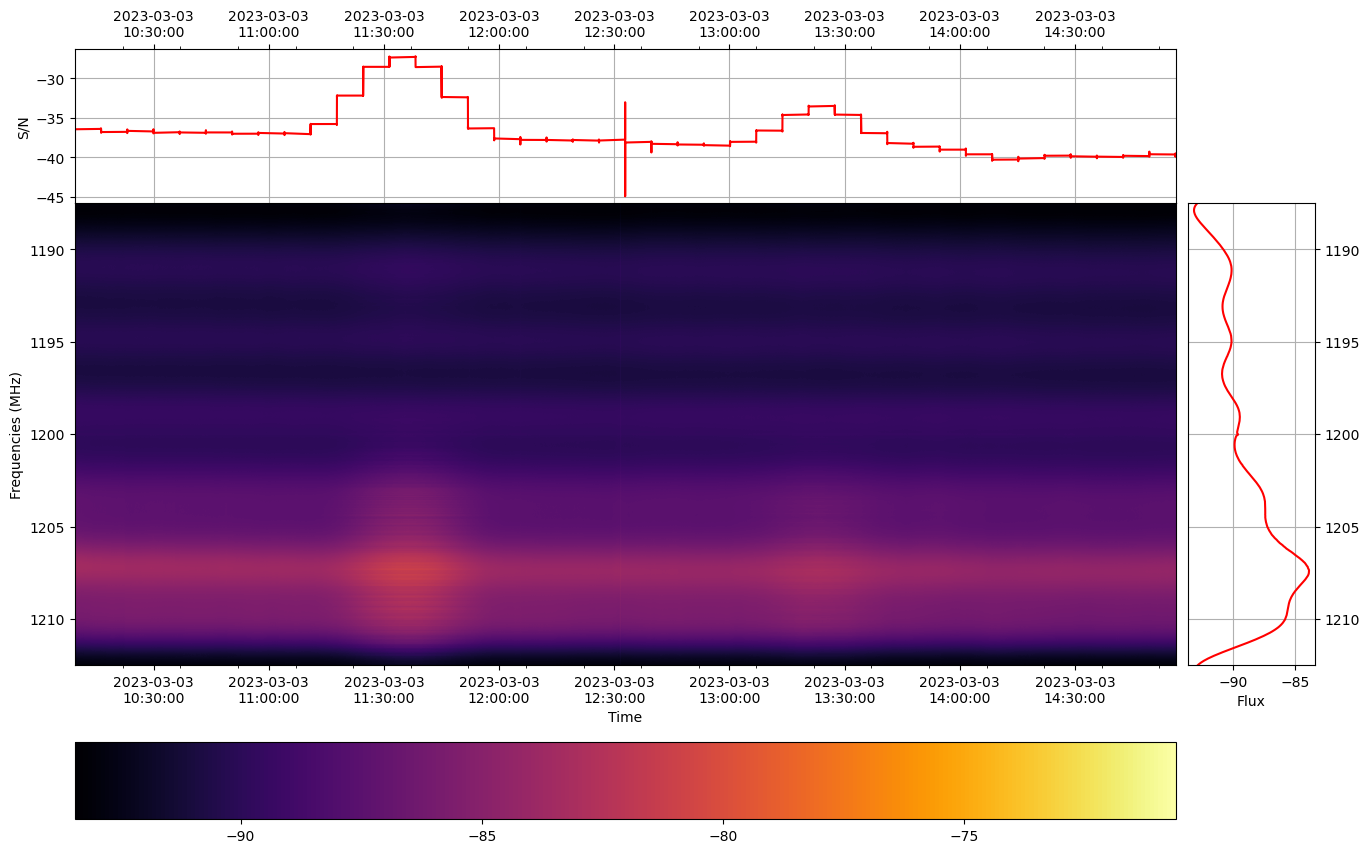

In [36]:
obs.plot_waterfall(obs.data);

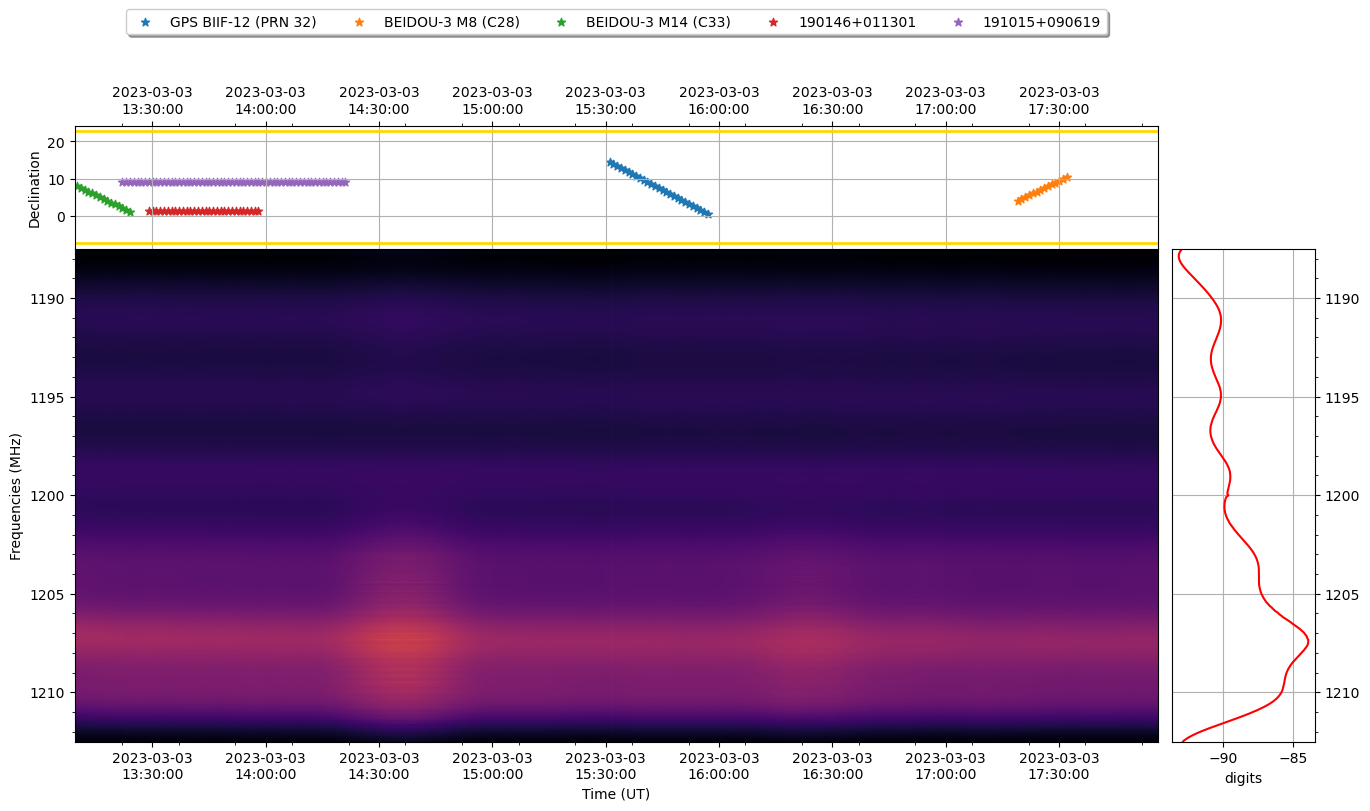

In [37]:
# Comparação do sinal recebido com objetos no céu.
obs.make_sky().sky.plot_timeseries(obs.data);

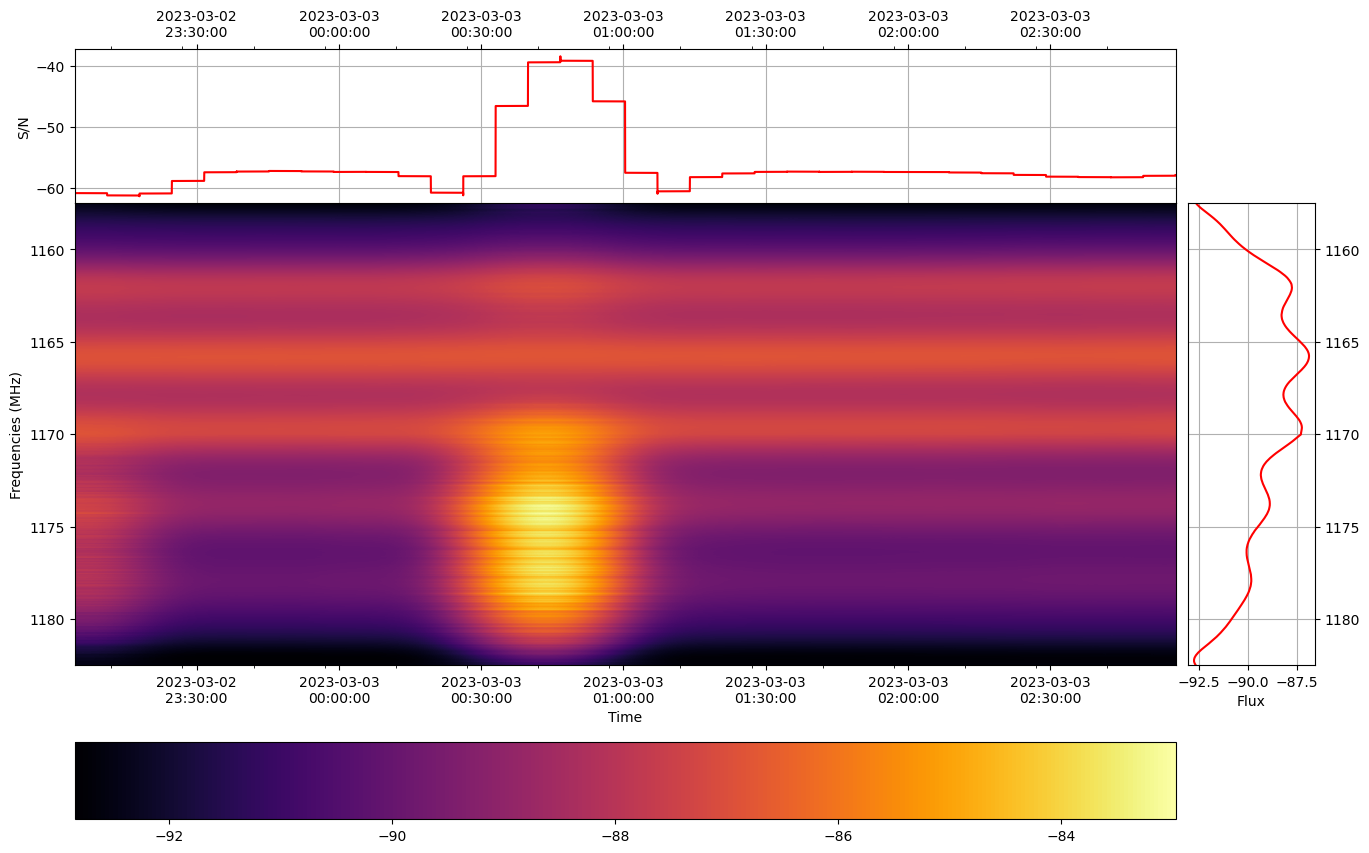

In [18]:
obs.plot_waterfall(obs.data.rolling(window=1000).mean().dropna());

In [ ]:
# df = obs.filter_data(obs.data.iloc[-180000:-100000, :], freqs=[1176, 1177])
# obs.plot_waterfall(df);

In [19]:
obs.data.shape

(35000, 1024)

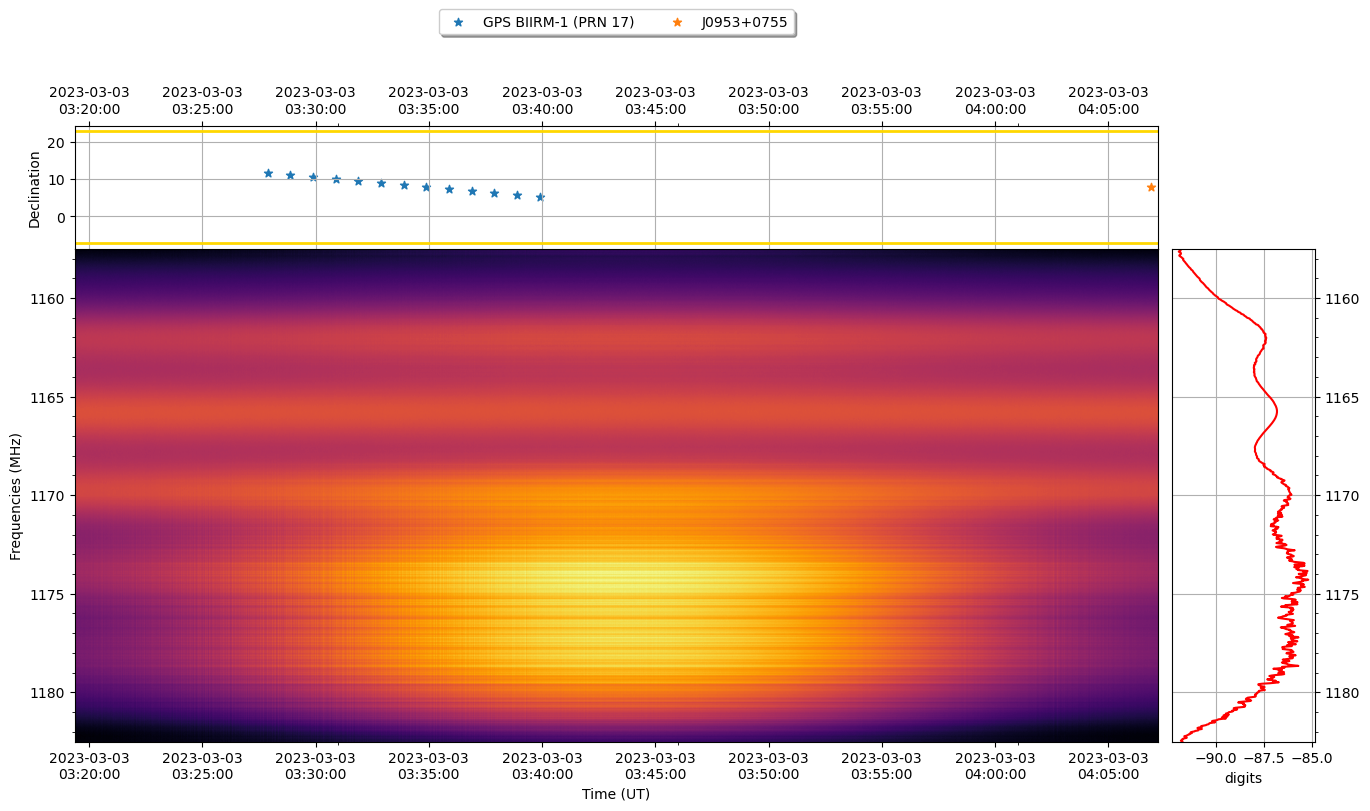

In [28]:
df = obs.data.iloc[-24000:-16000, :]
obs.sky.plot_timeseries(df);